In [37]:
#Import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
from numpy.lib.shape_base import vsplit
#Export data

filename = 'psi-harmonic.dat'
data = np.loadtxt(filename)

#Make list to store information from data
x = []        
psi = []
psi2 = []
xpsi2 = []
x2psi2 = []
potv = []

for i in range(0, len(data)):
  x.append(data[i][0])
  psi.append(data[i][1])
  psi2.append(data[i][1]*data[i][1])
  xpsi2.append(data[i][0]*psi2[i])
  x2psi2.append(data[i][0]*data[i][0]*psi2[i])

#Set the potential (based on potential used to calculate data)
for i in range(0, len(x)):
  #if statement
  v = 0.5 * x[i] * x[i]
  # v = 1/2 * 5**2
  potv.append(v)

In [39]:
def integrate(xpos, to_integrate):
  '''
  A function to integrate a list using Simpson 1/3 integration method
  Input   : a list of x data, a list of quantity to integrate
  Return  : intergartion result
  '''

  xmin = min(xpos)
  h = abs(x[2]-x[1])/2
  dx = abs(x[2]-x[1])
  result = 0

  for i in range(len(xpos)-2):
    result = result + (to_integrate[i] + 4*to_integrate[i+1] + to_integrate[i+2])
    xmin = xmin + dx 

  result = result * h/3

  return result

In [40]:
def diff(to_derive):
  '''
  Calculates derivation of points in data using forward finite
  Input   : a list of data to derive
  Return  : a list of derivation of each points in data
  '''

  result = []
  result.append(0) #Initialize first element
  dx = 0.01
  for i in range(0, len(to_derive)-1):
    df = (to_derive[i+1] - to_derive[i-1])/2*dx
    result.append(df)

  return result

In [41]:
def diff2(to_derive):
  '''
  Calculates second derivation of points in data using second order forward finite
  Input   : a list of data to derive
  Return  : a list of derivation of each points in data
  '''

  result = []
  result.append(0) #Initialize first element
  dx = 0.01
  for i in range(0, len(to_derive)-1):
    df2 = (to_derive[i+1]-2*to_derive[i]+to_derive[i-1])/(dx**2)
    result.append(df2)

  return result

In [42]:
def probability(xpos, psi2):
  '''
  Calculates the probability
  Input   : a list of x data, a list of psi*psi data
  Return  : probability (must equal to 1)
  '''

  prob = integrate(xpos, psi2)
  return prob

def position_xv(xpos, xpsi2):
  '''
  Calculates position expectation value
  Input   : a list of x data, a list of  x*psi*psi data
  Return  : position expectation value
  '''
  pos_xv = integrate(xpos, xpsi2)
  return pos_xv

def squarepos_xv(xpos, x2psi2):
  '''
  Calculates squared position expectation value
  Input   : a list of x data, a list of  x*x*psi*psi data
  Return  : squared position expectation value
  '''
  spos_xv = integrate(xpos, x2psi2)
  return spos_xv

def momentum_xv(xpos, psi):
  '''
  Calculates momentum expectation value
  Input   : a list of x data, a list of  psi data
  Return  : momentum expectation value
  '''

  df = diff(psi)
  dpsi = [psi[i] * df[i] for i in range(len(psi))]
  mom_xv = integrate(xpos, dpsi)
  return mom_xv

def squaremom_xv(xpos, psi):
  '''
  Calculates squared momentum expectation value
  Input   : a list of x data, a list of  psi data
  Return  : squared momentum expectation value
  '''

  df2 = diff2(psi)
  dpsi2 = [psi[i] * df2[i] for i in range(len(psi))]
  smom_xv = -1/4 * integrate(xpos, dpsi2)
  return smom_xv

def potential(xpos, psi2, pot):
  '''
  Calculates potential
  Input   : a list of x data, a list of  psi*psi data, a list of potential data
  Return  : potential value
  '''
  
  vpsi2 = [pot[i] * psi2[i] for i in range(len(psi2))]
  potv = integrate(xpos, vpsi2)
  return potv

def kinetic(xpos, psi):
  '''
  Calculates kinetic
  Input   : a list of x data, a list of  psi data
  Return  : kinetic value
  '''

  k = 0.5 * squaremom_xv(xpos, psi)
  return k


In [44]:
def analytics(n):
  '''
  Expectation value of harmonic oscillator (in a.u.)
  Input   : energy level
  Return  : expectation value of some quantities
  '''

  hbar = 1
  m = 1
  omega = 1

  prob = 1
  pos_xv = 0
  spos_xv = (hbar/m*omega) * (n+0.5)

  mom_xv = 0
  smom_xv = m*hbar*omega*(n+0.5)

  tp_pos = np.sqrt(spos_xv)
  tp_mom = np.sqrt(smom_xv)
  heis = (hbar/2) * (2*n + 1)

  kinetic = (1/2*m)*smom_xv
  potential = (1/2*m*omega**2)*spos_xv
  e_total = hbar*omega*(n+0.5)

  xvalue = [prob, pos_xv, spos_xv, mom_xv, smom_xv, kinetic, potential, e_total, tp_pos, tp_mom, heis]
  xvalues = []

  for i in range(len(xvalue)):
    xvalues.append(xvalue[i])

  return xvalues

In [50]:
L = abs(max(x)*2)
n = 0 #energy level

# prob_a, pos_xv_a, spos_xv_a, mom_xv_a, smom_xv_a, energy_a, tp_pos_a, tp_mom_a, tp_heis_a = analytics(L, n)
#Numeric
prob = probability(x, psi2)
pos_xv = position_xv(x, xpsi2)
spos_xv = squarepos_xv(x, x2psi2)
mom_xv = momentum_xv(x, psi)
smom_xv = squaremom_xv(x, psi)
e_kinetic = kinetic(x, psi)
e_potential = potential(x, psi2, potv)
energy = e_kinetic + e_potential
tp_pos = np.sqrt(spos_xv - (pos_xv**2))
tp_mom = np.sqrt(smom_xv - (mom_xv**2))
tp_heis = tp_pos * tp_mom

#Analytics
xvals_ana = analytics(n)

#Make dataframe to store values
expectation_value = ['Probability', 'Position', 'Square position', 'Momentum', 'Squared Momentum', 
                     'Kinetic Energy', 'Potential Energy', 'Total Energy', 'Position Uncertainty', 
                     'Momentum Uncertainty', 'Heisenberg Uncertainty']

output = pd.DataFrame(columns=['Expectation Value', 'Numerical', 'Analytical'])
output.loc[0] = [expectation_value[0], abs(prob), xvals_ana[0]]
output.loc[1] = [expectation_value[1], pos_xv, xvals_ana[1]]
output.loc[2] = [expectation_value[2], spos_xv, xvals_ana[2]]
output.loc[3] = [expectation_value[3], mom_xv, xvals_ana[3]]
output.loc[4] = [expectation_value[4], smom_xv, xvals_ana[4]]
output.loc[5] = [expectation_value[5], e_kinetic, xvals_ana[5]]
output.loc[6] = [expectation_value[6], e_potential, xvals_ana[6]]
output.loc[7] = [expectation_value[7], energy, xvals_ana[7]]
output.loc[8] = [expectation_value[8], tp_pos, xvals_ana[8]]
output.loc[9] = [expectation_value[9], tp_mom, xvals_ana[9]]
output.loc[10] = [expectation_value[10], tp_heis, xvals_ana[10]]
output

,Expectation Value,Numerical,Analytical
0,Probability,1.000000e+00,1
1,Position,-3.259273e-11,0
2,Square position,4.999999e-01,0.5
3,Momentum,1.248439e-05,0
4,Squared Momentum,3.118171e+00,0.5
5,Kinetic Energy,1.559085e+00,0.25
6,Potential Energy,2.500000e-01,0.25
7,Total Energy,1.809085e+00,0.5
8,Position Uncertainty,7.071067e-01,0.707107
9,Momentum Uncertainty,1.765834e+00,0.707107


In [46]:
print(psi)

[0.0, 1.4514833710019515e-06, 2.902667450793234e-06, 4.521320009746627e-06, 6.395401596005861e-06, 8.623090125235612e-06, 1.1317234684462483e-05, 1.4610137105120689e-05, 1.8658834968599503e-05, 2.365105441388193e-05, 2.9812001390310432e-05, 3.741216449332194e-05, 4.6776310165542725e-05, 5.8293860945996636e-05, 7.243085881761575e-05, 8.974372779924617e-05, 0.00011089506202278234, 0.0001366716768753381, 0.0001680051705695584, 0.00020599525086692884, 0.00025193608567834167, 0.0003073459358813373, 0.00037400032282176345, 0.00045396897043190667, 0.0005496567414579771, 0.0006638487576642116, 0.0007997598537680141, 0.0009610884629746648, 0.0011520749670904313, 0.0013775644651709844, 0.0016430738205360622, 0.0019548627359967483, 0.0023200084808273065, 0.0027464837502516196, 0.0032432369793135452, 0.003820274258769094, 0.004488741812454606, 0.005261007795463664, 0.00615074196311425, 0.0071729915455536475, 0.008344251446147092, 0.009682526668521055, 0.011207384673042014, 0.01293999517508997, 0.0

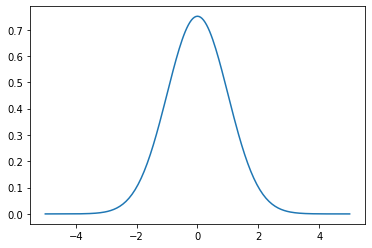

In [47]:
plt.plot(x, psi)